## Desciption

Here, we are training a model to predict both the transcription initiation rate and the direction of transcription (forward or reverse). This model uses the same architecture as CNN_5_0, but uses augmented data that includes reversed complements.

This model predicts between -1 (reverse) and 1 (forward) with 0 being no transcription. It also uses CNN_6's preprocessing, where 1 is high TX, so -1 is highy TX (reversed) and 1 is highy TX (forward).

In [1]:
import IsActive_1_0 as parent

In [2]:
name = 'IsActive_1_0'

In [3]:
import pandas as pd

file_path = '../Data/Urtecho_2023/Urtecho_2023.csv'

df = pd.read_csv(file_path)

In [4]:
# Displays only the first and last row
df.iloc[[0, -1]]

,promoter_sequence,expn_med_fitted_scaled,log_expn_med_fitted_scaled,active
0,TCCCGTGCTATGTTATTGACACACAAAAGCGTTGAGGAACAGTGAG...,0.467135,0.082044,0
45200,TGCCGCTCGGCGAGGCGCTGGAGCAGCATACCGGCGTTCCGGTTTA...,0.125388,0.056093,0


In [5]:
X, y = parent.combine_columns(df)
X, max_length = parent.preprocess_sequences(X)

In [6]:
X.shape

(45201, 150, 4)

In [7]:
X_train, X_test, y_train, y_test = parent.train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X, y = parent.combine_columns(df)
X, max_length = parent.preprocess_sequences(X)

In [9]:
X.shape

(45201, 150, 4)

In [10]:
X_train, X_test, y_train, y_test = parent.train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = parent.build_cnn_model(X.shape[1:])
history = parent.train_model(model, X_train, y_train, X_test, y_test)
loss = parent.evaluate_model(model, X_test, y_test)
parent.save_model(model, name)

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8754 - loss: 0.3715 - val_accuracy: 0.8719 - val_loss: 0.3604
Epoch 2/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8738 - loss: 0.3486 - val_accuracy: 0.8719 - val_loss: 0.3507
Epoch 3/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.8719 - loss: 0.3236 - val_accuracy: 0.8746 - val_loss: 0.3307
Epoch 4/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.8821 - loss: 0.2830 - val_accuracy: 0.8715 - val_loss: 0.3181
Epoch 5/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9029 - loss: 0.2432 - val_accuracy: 0.8843 - val_loss: 0.2964
Epoch 6/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9225 - loss: 0.1996 - val_accuracy: 0.8925 - val_loss: 0.3048
Epoch 7/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9396 - loss: 0.1584 - val_accuracy: 0.8704 - val_loss: 0.3214
Epoch 8/150
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 

283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


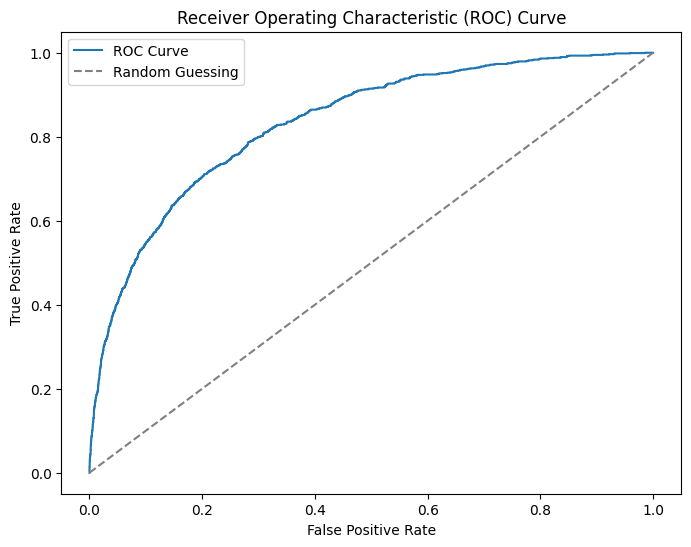

In [12]:
predicted = parent.load_and_predict(name, X_test)
observed = y_test

parent.plot_roc_curve(observed, parent.ravel(predicted))

1413/1413 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step


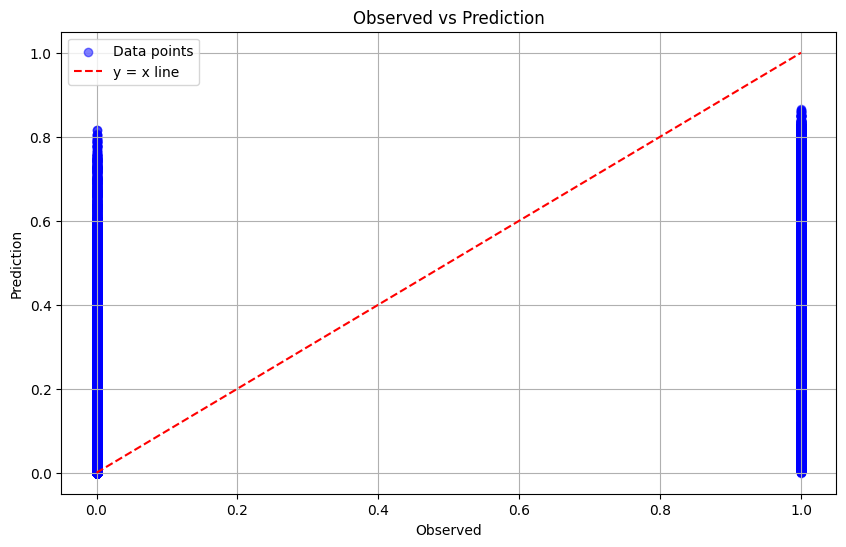

In [13]:
predicted = parent.load_and_predict(name, X)
observed = df['active'].values

parent.plot_scatter(observed, parent.ravel(predicted))

In [14]:
loss

{'accuracy': 0.8843048335361132,
 'precision': 0.5765027322404371,
 'recall': 0.3644214162348877,
 'f1_score': 0.44656084656084655,
 'auc': 0.8335736791333179}

{'accuracy': 0.8941453494594884,
 'precision': 0.6040609137055838,
 'recall': 0.3210431654676259,
 'f1_score': 0.4192601291837933,
 'auc': 0.833897873803982}

In [15]:
from keras.models import Sequential, load_model

model = load_model('../Models/' + name + '.keras')

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 147, 64)        │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 73, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 70, 64)         │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 35, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2240)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       143,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 483,077 (1.84 MB)

 Trainable params: 161,025 (629.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 322,052 (1.23 MB)